In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cmcrameri
import cmcrameri.cm as cmc
from scipy.stats import pearsonr
from PIL import Image

In [2]:
# Load the datasets
data_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/entropy_log.csv")
data_2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/entropy_log.csv")

# Split 'Filename' into 'SubjectID' and 'SessionNr'
data_1[['ParticipantID', 'SessionNr']] = data_1['Filename'].str.split('_', expand=True)
data_2[['ParticipantID', 'SessionNr']] = data_2['Filename'].str.split('_', expand=True)

# Drop the original 'Filename' column
data_1.drop(columns=['Filename'], inplace=True)
data_2.drop(columns=['Filename'], inplace=True)

# Convert SessionNr to integer if possible
data_1['SessionNr'] = pd.to_numeric(data_1['SessionNr'], errors='coerce')
data_2['SessionNr'] = pd.to_numeric(data_2['SessionNr'], errors='coerce')

# Stack the two datasets on top of each other (concatenate rows)
stacked_df = pd.concat([data_1, data_2], ignore_index=True)
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Overall_Transition_Entropy                   290 non-null    float64
 1   Transition_Entropy_Building                  290 non-null    float64
 2   Stationary_Entropy_Building                  290 non-null    float64
 3   Transition_Entropy_Background                290 non-null    float64
 4   Stationary_Entropy_Background                290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential  290 non-null    float64
 6   Stationary_Entropy_TaskBuilding_Residential  290 non-null    float64
 7   Transition_Entropy_Passive_Agent             290 non-null    float64
 8   Stationary_Entropy_Passive_Agent             290 non-null    float64
 9   Transition_Entropy_TaskBuilding_Public       290 non-null    float64
 10  St

In [ ]:
# Load images
image1 = Image.open("path_to_image1.jpg")
image2 = Image.open("path_to_image2.jpg")

# Resize images to have the same height (optional, for alignment)
image2 = image2.resize((int(image2.width * image1.height / image2.height), image1.height))

# Create a new blank image to place images side by side
combined_width = image1.width + image2.width
combined_image = Image.new("RGB", (combined_width, image1.height))

# Paste images into the combined image
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (image1.width, 0))

# Display the combined image
plt.imshow(combined_image)
plt.axis("off")  # Remove axes
plt.show()

In [3]:
Coverage =  pd.read_csv('/Volumes/TwoTeras/Graph_Stuff/CSVs/Unique_NodeVisit_Ratios.csv')
# Force 'ParticipantID' to have 4 digits as a string
Coverage['ParticipantID'] = Coverage['ParticipantID'].apply(lambda x: f"{int(x):04d}")
display(Coverage.info())

Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         345 non-null    object 
 1   SessionNr             345 non-null    int64  
 2   IndividualNodeCount   345 non-null    int64  
 3   Experiment            345 non-null    object 
 4   CummulativeNodeCount  345 non-null    int64  
 5   IndividualRatio       345 non-null    float64
 6   CummulativeRatio      345 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 19.0+ KB


None

ParticipantId  Session  StrategyCount  StrategyPerc      Strategy  \
0           1754        1            7.0          0.22  Conservative   
1           1754        1           25.0          0.78   Explorative   
2           1754        1            6.0          0.24  Conservative   
3           1754        1           19.0          0.76   Explorative   
4           1754        1            2.0          0.12  Conservative   

           Decision  Total Experiment  
0     AgentAtChosen   32.0       Exp1  
1     AgentAtChosen   32.0       Exp1  
2  AgentAtNotChosen   25.0       Exp1  
3  AgentAtNotChosen   25.0       Exp1  
4       AgentAtBoth   17.0       Exp1

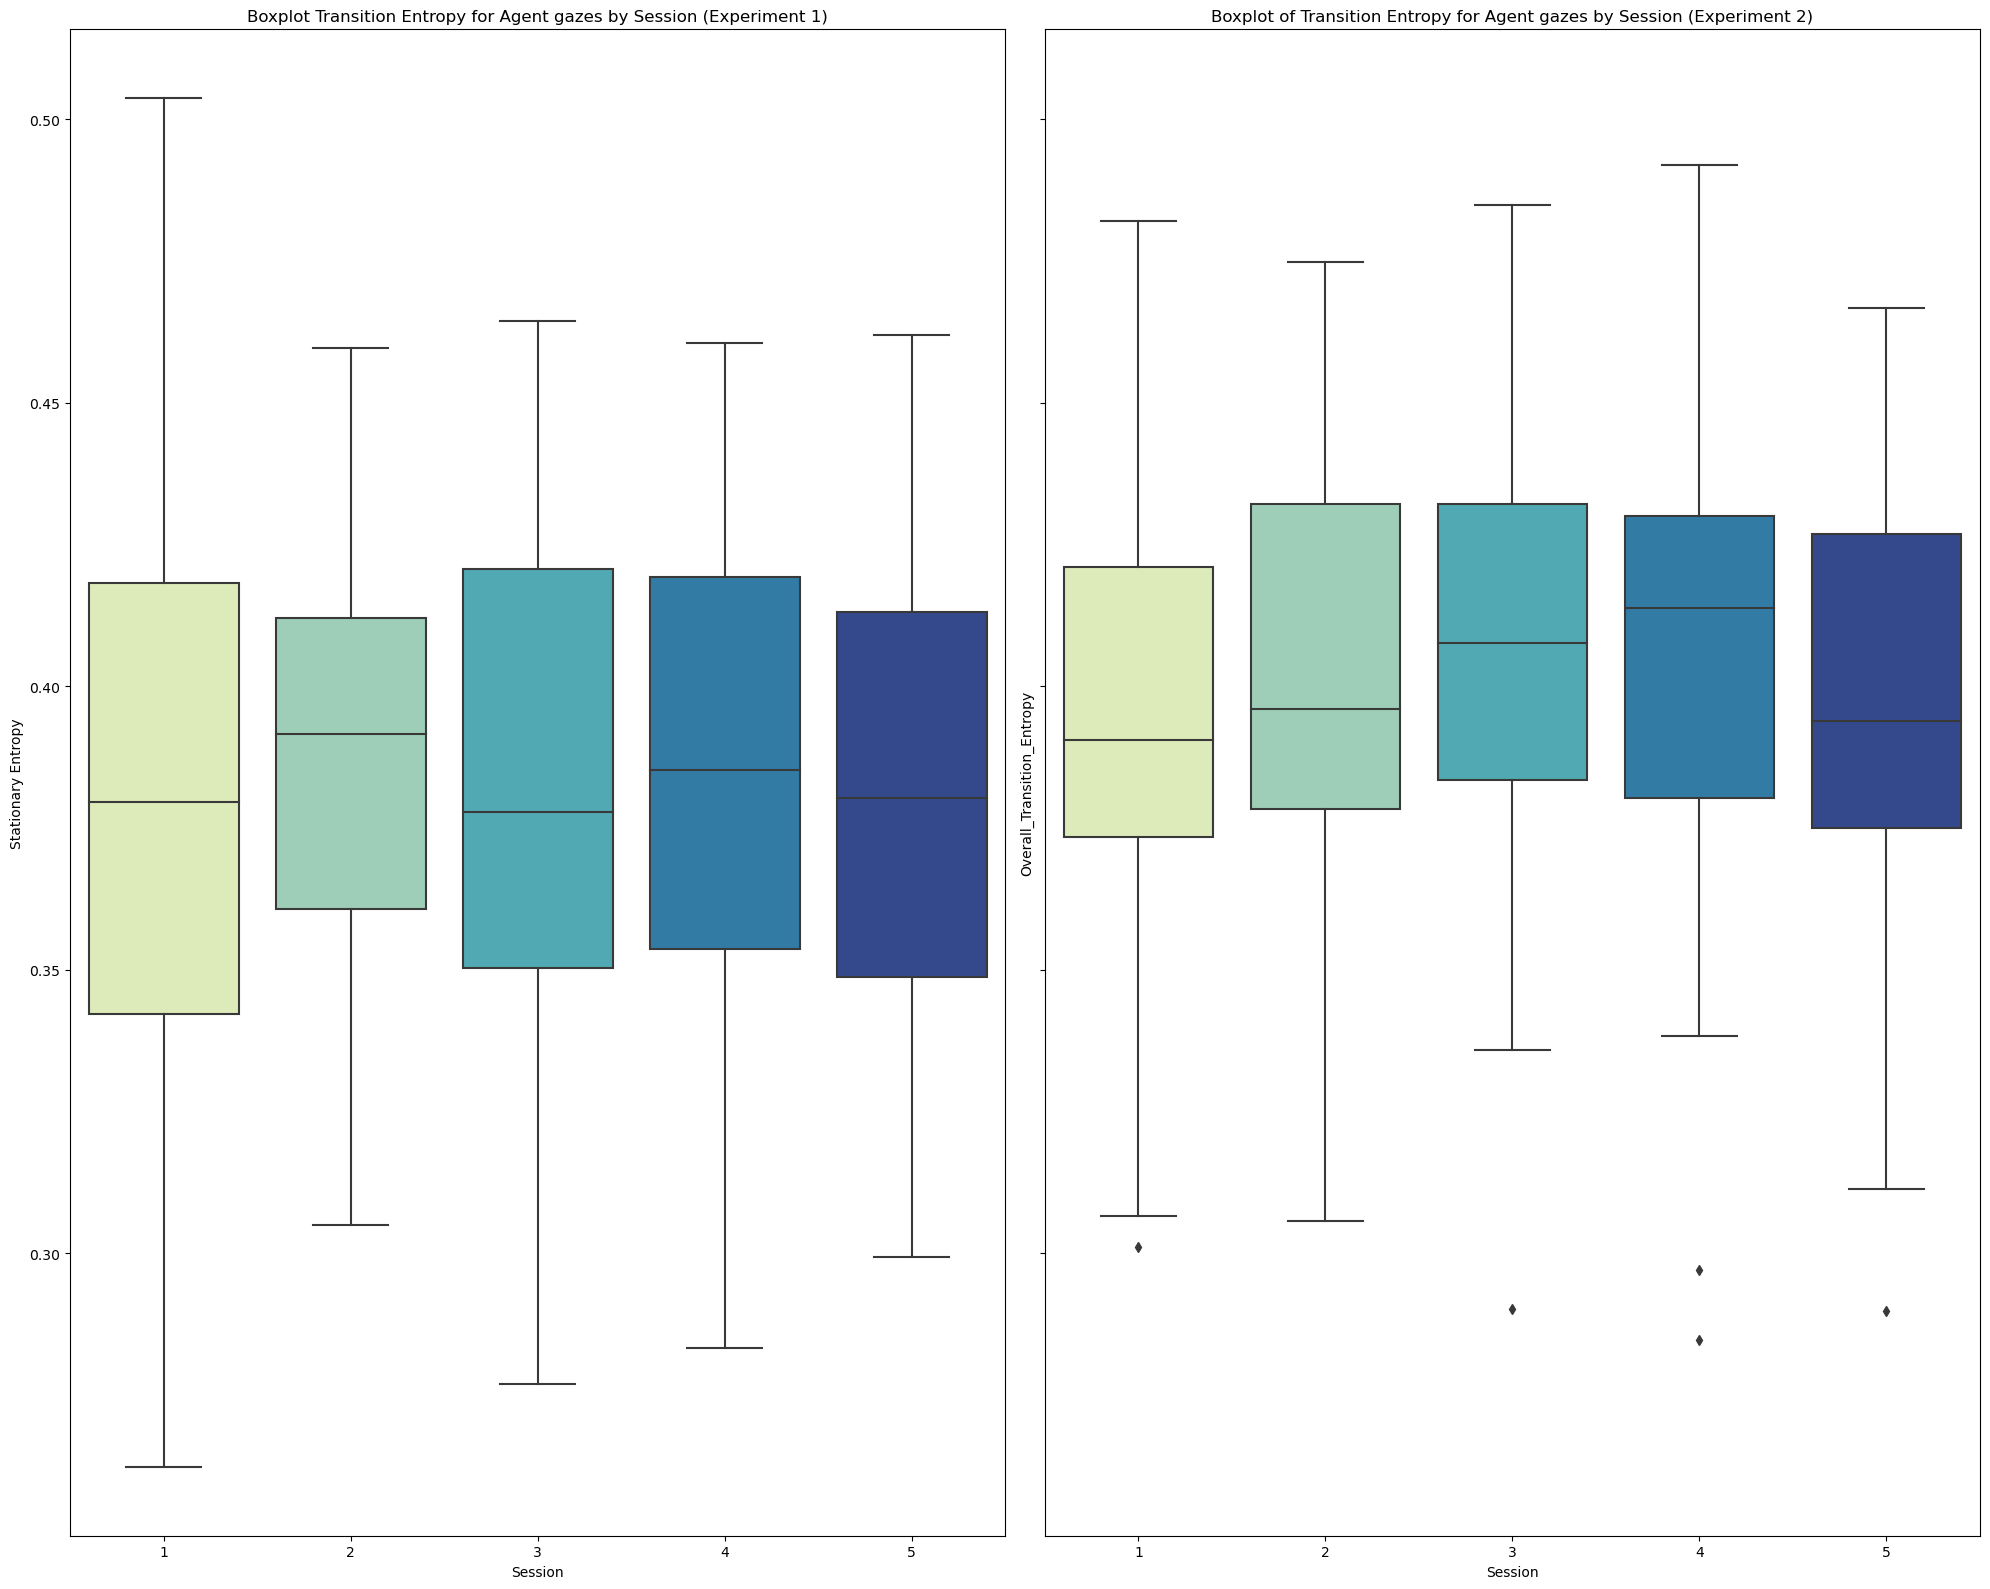

In [4]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(20, 16), sharey=True)

# Boxplot for Experiment 1
sns.boxplot(data=data_1, x='SessionNr', y='Overall_Transition_Entropy', ax=axes[0], palette=palette[:num_sessions_1])
axes[0].set_title("Boxplot Transition Entropy for Agent gazes by Session (Experiment 1)")
axes[0].set_xlabel("Session")
axes[0].set_ylabel("Stationary Entropy")

# Boxplot for Experiment 2
sns.boxplot(data=data_2, x='SessionNr', y='Overall_Transition_Entropy', ax=axes[1], palette=palette[:num_sessions_2])
axes[1].set_title("Boxplot of Transition Entropy for Agent gazes by Session (Experiment 2)")
axes[1].set_xlabel("Session")

plt.tight_layout()
plt.show()


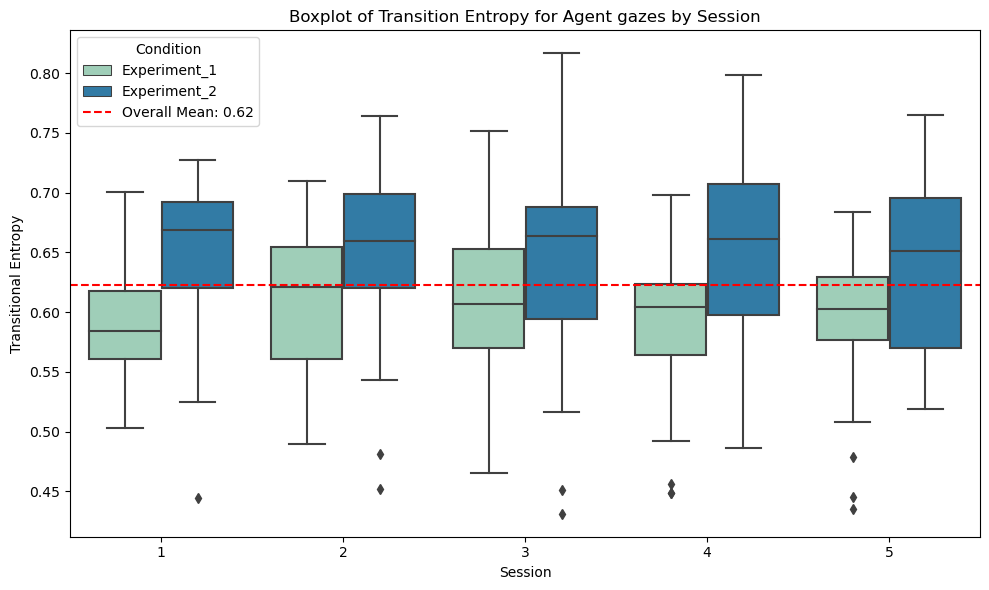

In [5]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Experiment'] = 'Experiment_1'
data_2['Experiment'] = 'Experiment_2'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Active_Agent'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Active_Agent', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

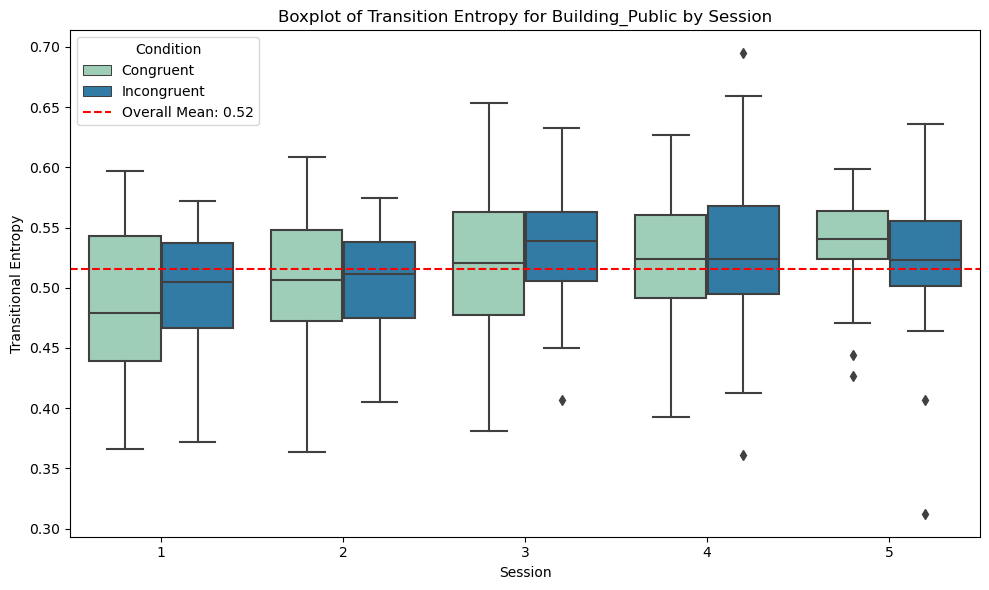

In [6]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_TaskBuilding_Public'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_TaskBuilding_Public', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Building_Public by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

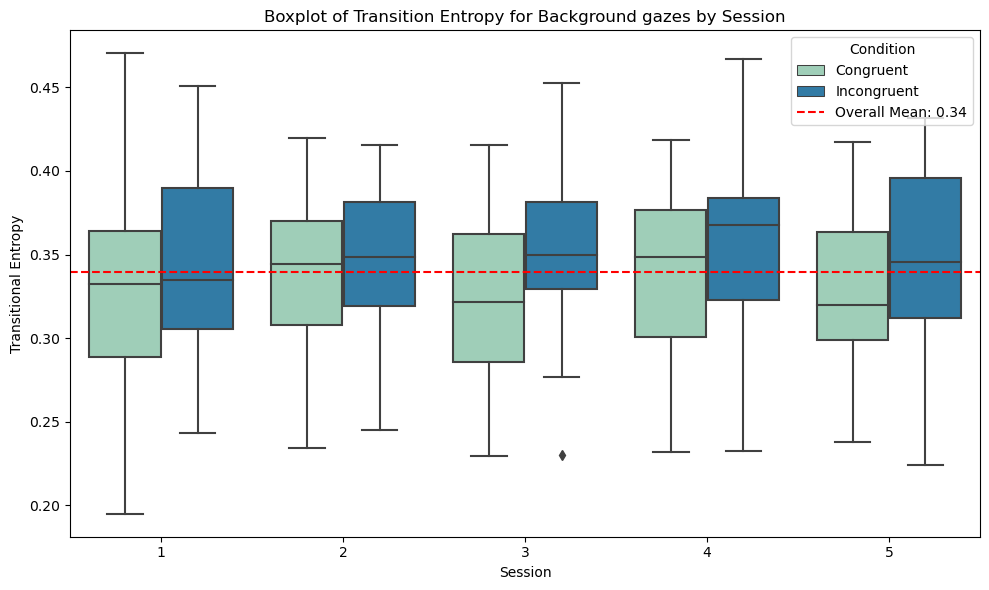

In [7]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Background'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Background', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Background gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

## Introduction of dwelling times

In [8]:
Fixation_data_Exp1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Session_Exp1.cvs")
Fixation_data_Exp1["Experiment"] = 1
Fixation_data_Exp2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Sessions_Exp2.cvs")
Fixation_data_Exp2["Experiment"] = 2

# Stack the two datasets on top of each other (concatenate rows)
Fixation_data_stacked = pd.concat([Fixation_data_Exp1, Fixation_data_Exp2], ignore_index=True)
Fixation_data_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20782 entries, 0 to 20781
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20782 non-null  int64  
 1   SubjectID              20782 non-null  int64  
 2   Session                20782 non-null  int64  
 3   recoded                20782 non-null  object 
 4   Collider_CategoricalN  20782 non-null  object 
 5   Dwelling_Time          20782 non-null  float64
 6   Fixation_Count         20782 non-null  int64  
 7   Experiment             20782 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.3+ MB


In [9]:
Fixations_Grouped = pd.DataFrame(Fixation_data_stacked.groupby(["SubjectID", "Session", "Experiment", "Collider_CategoricalN"]
                                                         )[["Dwelling_Time", "Fixation_Count"]].mean())
Fixations_Grouped.reset_index(inplace=True)
# Filter rows where 'Collider_CategoricalN' contains 'Agent'
Fixations_Agent = Fixations_Grouped[Fixations_Grouped['Collider_CategoricalN'].str.contains('Agent')]

# Display the filtered DataFrame
Fixations_Agent.head()

# Ensure the column names match for merging
Fixations_Agent.rename(columns={'SubjectID': 'ParticipantID', "Session": "SessionNr"}, inplace=True)
# Step 1: Ensure columns are of the same data type
Fixations_Agent['ParticipantID'] = Fixations_Agent['ParticipantID'].astype(str)
Fixations_Agent['SessionNr'] = Fixations_Agent['SessionNr'].astype(str)


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_9966/790982001.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_Agent.rename(columns={'SubjectID': 'ParticipantID', "Session": "SessionNr"}, inplace=True)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_9966/790982001.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_Agent['ParticipantID'] = Fixations_Agent['ParticipantID'].astype(str)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_9966/790982001.py:14: SettingWithCopyWarning: 
A value is trying to be set 

In [10]:
Fixations_Agent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 1406
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ParticipantID          564 non-null    object 
 1   SessionNr              564 non-null    object 
 2   Experiment             564 non-null    int64  
 3   Collider_CategoricalN  564 non-null    object 
 4   Dwelling_Time          564 non-null    float64
 5   Fixation_Count         564 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 30.8+ KB


In [11]:
# Step 1: Create a pivot table
Fixations_Wide = (
    Fixations_Agent
    .pivot_table(
        index=['ParticipantID', 'SessionNr', 'Experiment'],  # Grouping keys
        columns='Collider_CategoricalN',  # Values to pivot
        values=['Dwelling_Time', 'Fixation_Count'],  # Metrics to pivot
        fill_value=0,  # Replace NaN with 0
        aggfunc='sum'  # Aggregate function
    )
)

# Step 2: Flatten the MultiIndex columns for cleaner names
Fixations_Wide.columns = ['_'.join(col).strip() for col in Fixations_Wide.columns.values]

# Step 3: Reset the index to return a clean DataFrame
Fixations_Wide = Fixations_Wide.reset_index()

# Step 4: Display the resulting DataFrame
Fixations_Wide.head()

ParticipantID SessionNr  Experiment  Dwelling_Time_Active_Agent  \
0          1031         1           2                    1.458158   
1          1031         2           2                    2.481094   
2          1031         3           2                    5.283813   
3          1031         4           2                    8.451983   
4          1031         5           2                   10.772981   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     0.679140                     8.333333   
1                     1.255934                     5.583333   
2                     2.788555                    22.473684   
3                     5.152836                    25.562500   
4                     6.494074                    14.176471   

   Fixation_Count_Passive_Agent  
0                      3.769231  
1                      4.500000  
2                     10.875000  
3                     17.000000  
4                     12.714286

In [12]:

# Step 1: Ensure columns are of the same data type
Fixations_Wide['ParticipantID'] = Fixations_Wide['ParticipantID'].astype(str)
combined_data['ParticipantID'] = combined_data['ParticipantID'].astype(str)

Fixations_Wide['SessionNr'] = Fixations_Wide['SessionNr'].astype(str)
combined_data['SessionNr'] = combined_data['SessionNr'].astype(str)

# Merge the two datasets on 'SubjectID', 'Session', and 'Experiment' (adjusting the common key names)
# Perform the merge
combined_data_fixations = pd.merge(Fixations_Wide, combined_data, on=['ParticipantID', 'SessionNr'], how='inner')

# Display the merged dataset
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                    1.458158   
1          1031         2             2                    2.481094   
2          1031         3             2                    5.283813   
3          1031         4             2                    8.451983   
4          1031         5             2                   10.772981   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     0.679140                     8.333333   
1                     1.255934                     5.583333   
2                     2.788555                    22.473684   
3                     5.152836                    25.562500   
4                     6.494074                    14.176471   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                      3.769231                    0.389249   
1                      4.500000                    0.378364   
2                     10.875000                    0.442325   
3                     17.000000                    0.471595   
4                     12.714286                    0.391307   

   Transition_Entropy_Building  Stationary_Entropy_Building  ...  \
0                     0.438203                     0.152295  ...   
1                     0.464861                     0.146222  ...   
2                     0.436753                     0.153293  ...   
3                     0.464841                     0.139937  ...   
4                     0.471721                     0.131888  ...   

   Transition_Entropy_Passive_Agent_Face  \
0                               0.608887   
1                               0.582487   
2                               0.539006   
3                               0.643397   
4                               0.659951   

   Stationary_Entropy_Passive_Agent_Face  Transition_Entropy_Global_Landmark  \
0                               0.006830                            0.455617   
1                               0.004947                            0.410918   
2                               0.029476                            0.478353   
3                               0.048051                            0.560158   
4                               0.022560                            0.460003   

   Stationary_Entropy_Global_Landmark  Transition_Entropy_Active_Agent  \
0                            0.037203                         0.681446   
1                            0.024851                         0.657728   
2                            0.018390                         0.579004   
3                            0.020855                         0.584689   
4                            0.019106                         0.526395   

   Stationary_Entropy_Active_Agent  Transition_Entropy_Active_Agent_Face  \
0                         0.025486                              0.456680   
1                         0.021338                              0.509265   
2                         0.063003                              0.515783   
3                         0.069430                              0.635429   
4                         0.053301                              0.494206   

   Stationary_Entropy_Active_Agent_Face  Experiment_y    Condition  
0                              0.012404  Experiment_2  Incongruent  
1                              0.006166  Experiment_2  Incongruent  
2                              0.045352  Experiment_2  Incongruent  
3                              0.041567  Experiment_2  Incongruent  
4                              0.015423  Experiment_2  Incongruent  

[5 rows x 28 columns]

In [13]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 144
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Overall_Transition_Entropy                   290 non-null    float64
 1   Transition_Entropy_Building                  290 non-null    float64
 2   Stationary_Entropy_Building                  290 non-null    float64
 3   Transition_Entropy_Background                290 non-null    float64
 4   Stationary_Entropy_Background                290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential  290 non-null    float64
 6   Stationary_Entropy_TaskBuilding_Residential  290 non-null    float64
 7   Transition_Entropy_Passive_Agent             290 non-null    float64
 8   Stationary_Entropy_Passive_Agent             290 non-null    float64
 9   Transition_Entropy_TaskBuilding_Public       290 non-null    float64
 10  Station

In [14]:
# Specify the columns for correlation analysis
active_columns = [col for col in combined_data_fixations.columns if ('Active' in col or 'Public' in col) and 'Stationary' not in col]
passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col or 'Residential' in col) and 'Stationary' not in col]
extra_columns = [ 'Overall_Transition_Entropy', 'Transition_Entropy_Building']

# Further filter for relevant columns in Active and Passive Agents
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter data based on conditions
filtered_congruent = combined_data_fixations[combined_data_fixations['Condition'] == 'Congruent']
filtered_incongruent = combined_data_fixations[combined_data_fixations['Condition'] == 'Incongruent']

# Filter only the required columns for correlation matrices
filtered_active_congruent_data = filtered_congruent[active_columns]
filtered_active_incongruent_data = filtered_incongruent[active_columns]
filtered_passive_data = combined_data_fixations[passive_columns]

# Calculate correlation matrices
corr_matrix_congruent = filtered_active_congruent_data.corr()
corr_matrix_incongruent = filtered_active_incongruent_data.corr()
corr_matrix_passive = filtered_passive_data.corr()


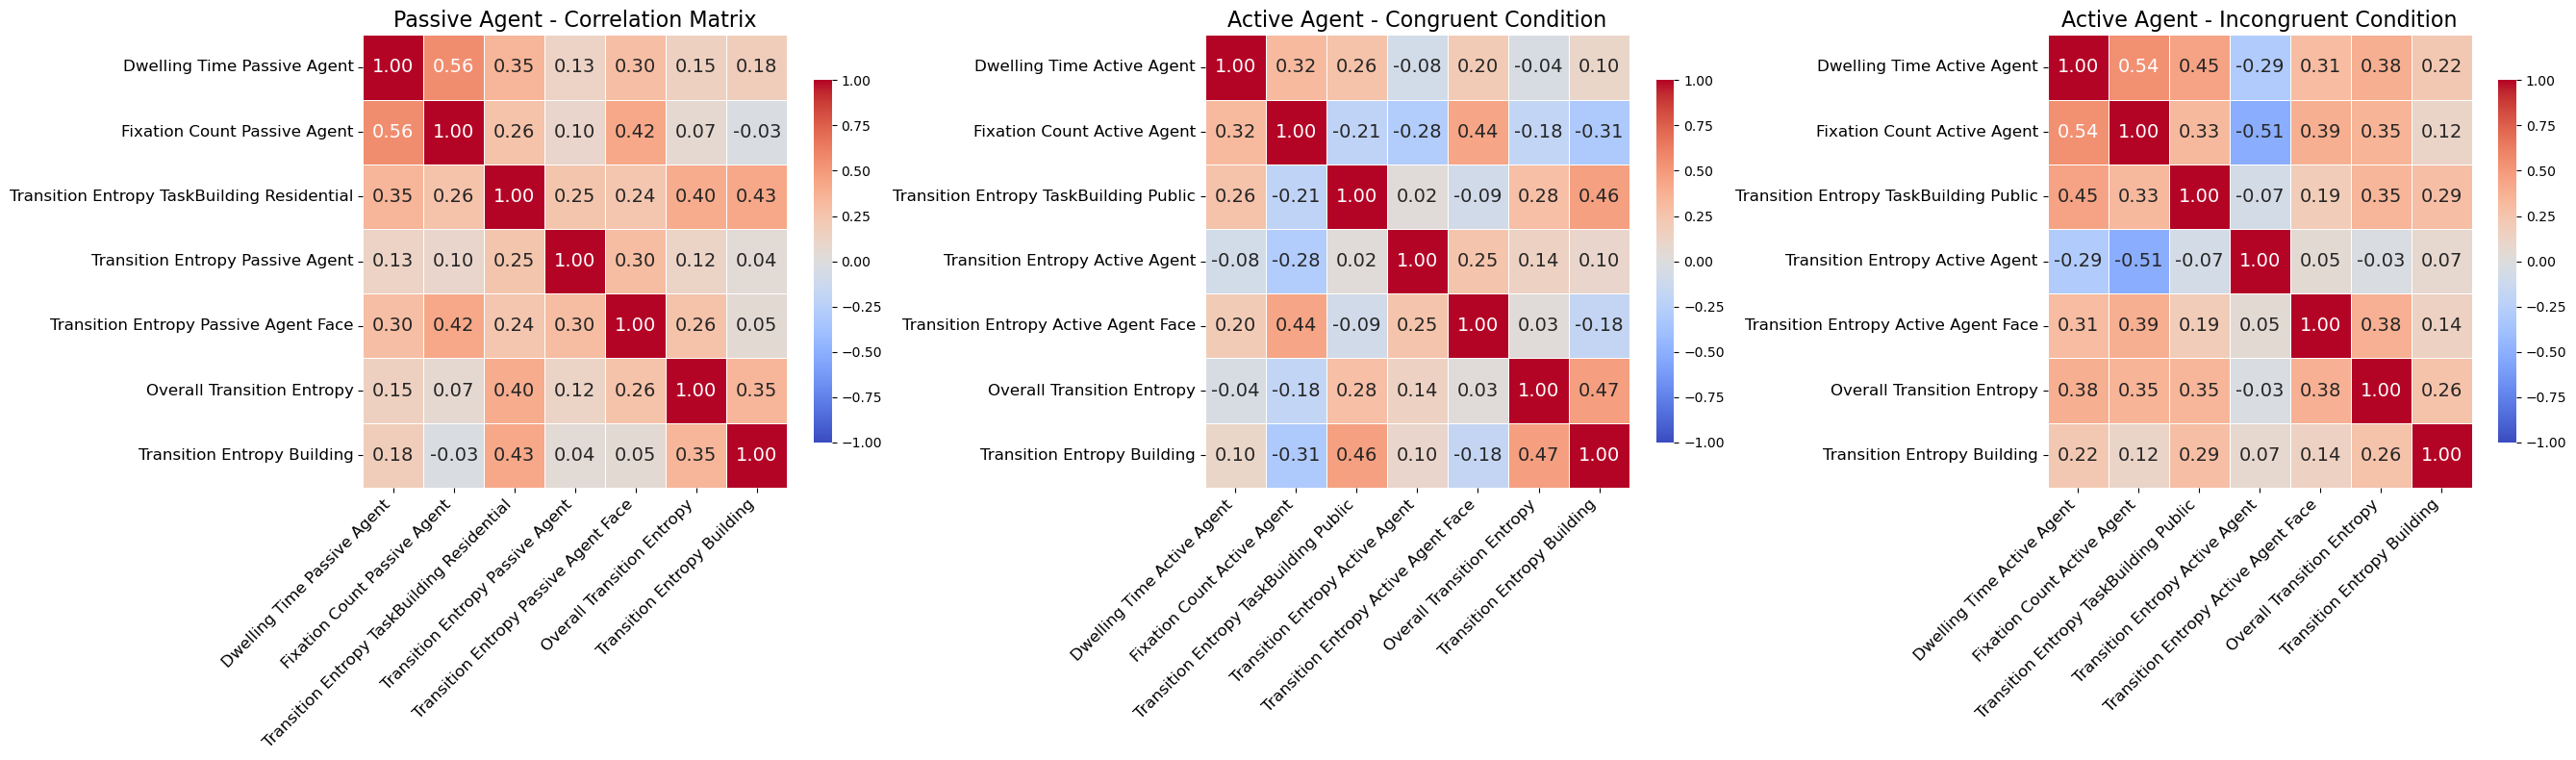

In [15]:
# Define the function to format tick labels
def format_ticks(labels):
    """Replace underscores with spaces in tick labels."""
    return [label.get_text().replace("_", " ") for label in labels]

# Plot the correlation matrices with larger annotations and improved rendering
fig, axes = plt.subplots(1, 3, figsize=(27, 8))  # Increase figure size for better rendering

# Passive Agent correlation matrix
sns.heatmap(
    corr_matrix_passive,
    annot=True,
    annot_kws={"size": 14},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_passive.isnull(),
    ax=axes[0]
)
axes[0].set_title('Passive Agent - Correlation Matrix', fontsize=16)
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0, fontsize=12)

# Active Agent - Congruent condition correlation matrix
sns.heatmap(
    corr_matrix_congruent,
    annot=True,
    annot_kws={"size": 14},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_congruent.isnull(),
    ax=axes[1]
)
axes[1].set_title('Active Agent - Congruent Condition', fontsize=16)
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0, fontsize=12)

# Active Agent - Incongruent condition correlation matrix
sns.heatmap(
    corr_matrix_incongruent,
    annot=True,
    annot_kws={"size": 14},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_incongruent.isnull(),
    ax=axes[2]
)
axes[2].set_title('Active Agent - Incongruent Condition', fontsize=16)
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0, fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure with higher DPI for better quality
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Updated_Entropy_Correlation_Matrices_HighRes_Improved.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()


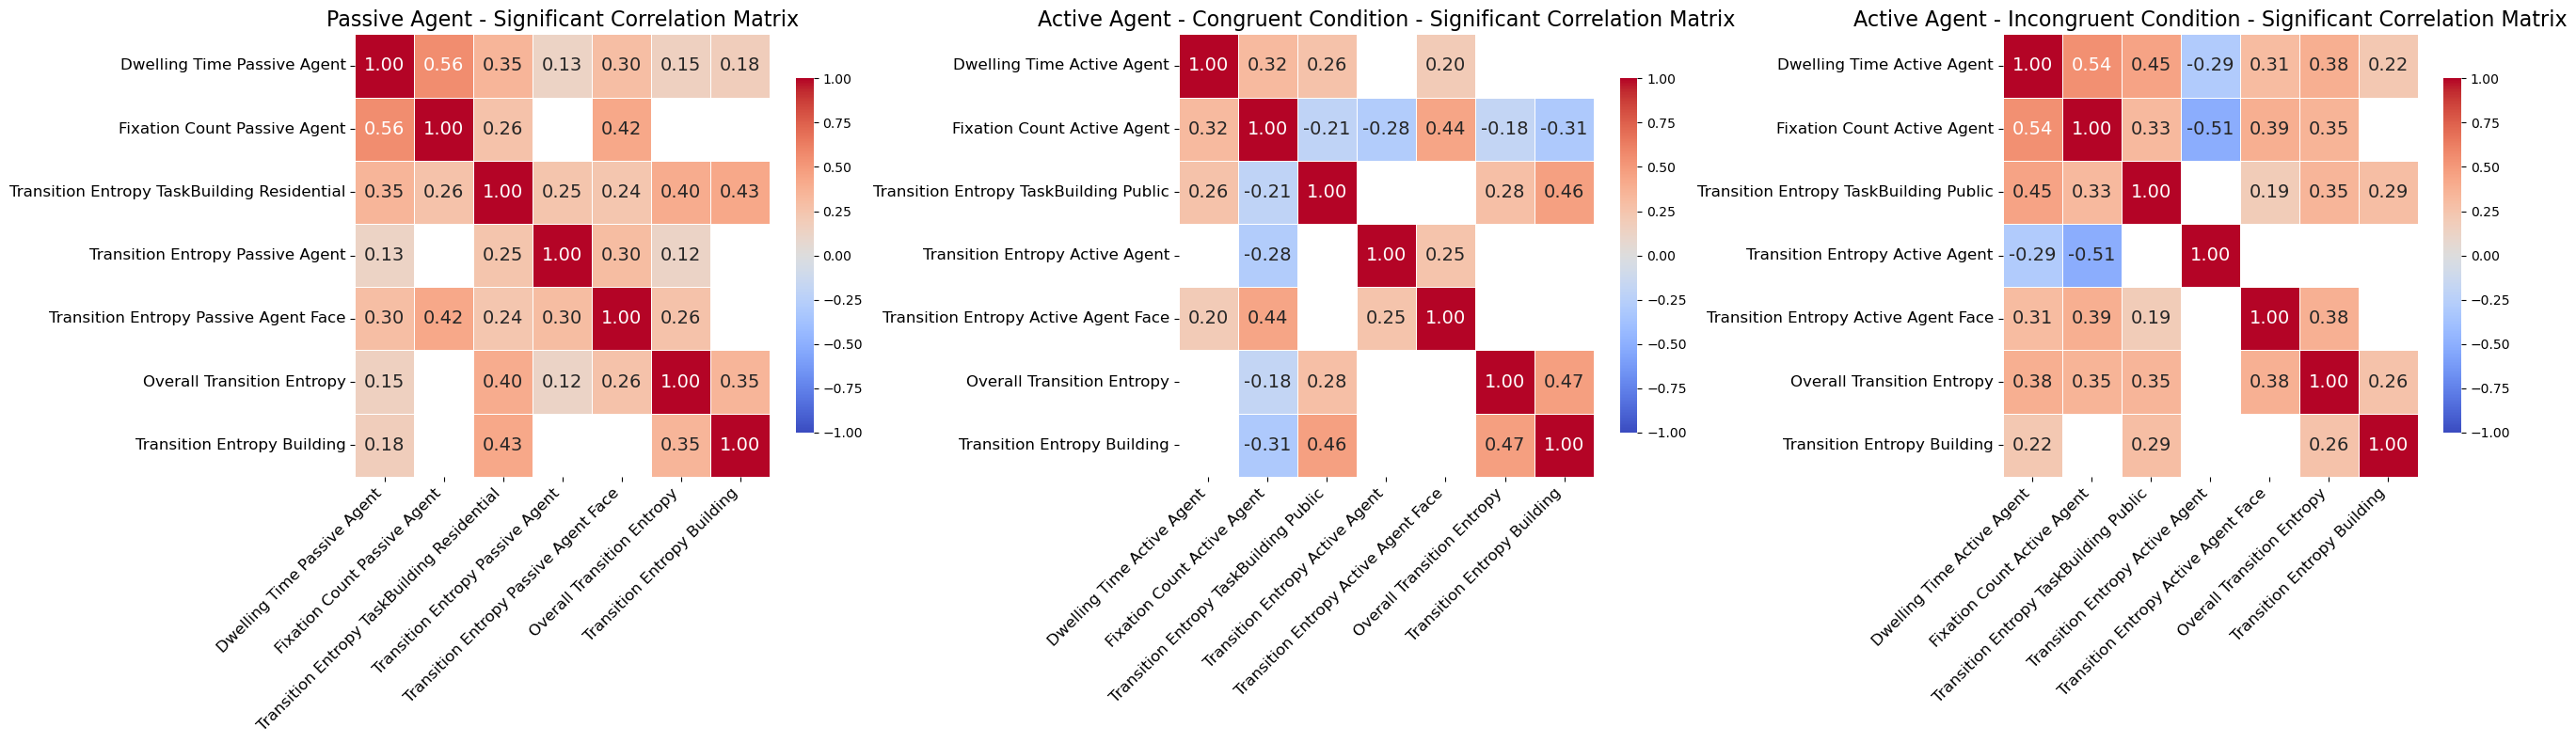

In [16]:
# Function to calculate significant correlations
def calculate_significant_correlations(df, alpha=0.05):
    """Calculate correlations and mask non-significant ones."""
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

    for row in df.columns:
        for col in df.columns:
            if row != col:
                valid_data = df[[row, col]].dropna()
                if len(valid_data) > 1:  # Ensure enough data points for correlation
                    _, p_value = pearsonr(valid_data[row], valid_data[col])
                    p_matrix.at[row, col] = p_value
                else:
                    p_matrix.at[row, col] = np.nan  # Mark as NaN if insufficient data

    # Mask non-significant correlations
    mask = (p_matrix > alpha) | (p_matrix.isna())
    corr_matrix[mask] = np.nan
    return corr_matrix


# Calculate the significant correlation matrices
corr_matrix_congruent = calculate_significant_correlations(filtered_active_congruent_data)
corr_matrix_incongruent = calculate_significant_correlations(filtered_active_incongruent_data)
corr_matrix_passive = calculate_significant_correlations(filtered_passive_data)
# Plot the significant correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(27, 8))  # Large figure for better rendering


# Plot Passive Agent correlation matrix
sns.heatmap(
    corr_matrix_passive, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_passive.isnull(), 
    ax=axes[0]
)
axes[0].set_title('Passive Agent - Significant Correlation Matrix', fontsize=16)
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0, fontsize=12)

# Plot Congruent condition correlation matrix
sns.heatmap(
    corr_matrix_congruent, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_congruent.isnull(), 
    ax=axes[1]
)
axes[1].set_title('Active Agent - Congruent Condition - Significant Correlation Matrix', fontsize=16)
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0, fontsize=12)

# Plot Incongruent condition correlation matrix
sns.heatmap(
    corr_matrix_incongruent, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_incongruent.isnull(), 
    ax=axes[2]
)
axes[2].set_title('Active Agent - Incongruent Condition - Significant Correlation Matrix', fontsize=16)
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0, fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure with higher DPI for better quality
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Significant_Entropy_Correlation_Matrices_HighRes.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()


In [17]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 144
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Overall_Transition_Entropy                   290 non-null    float64
 1   Transition_Entropy_Building                  290 non-null    float64
 2   Stationary_Entropy_Building                  290 non-null    float64
 3   Transition_Entropy_Background                290 non-null    float64
 4   Stationary_Entropy_Background                290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential  290 non-null    float64
 6   Stationary_Entropy_TaskBuilding_Residential  290 non-null    float64
 7   Transition_Entropy_Passive_Agent             290 non-null    float64
 8   Stationary_Entropy_Passive_Agent             290 non-null    float64
 9   Transition_Entropy_TaskBuilding_Public       290 non-null    float64
 10  Station

In [18]:
Long_Agent = combined_data[['ParticipantID', 'SessionNr', 'Experiment', 'Condition', 'Transition_Entropy_Active_Agent', 'Transition_Entropy_Passive_Agent']].copy()
Long_Agent.rename({'Transition_Entropy_Active_Agent': 'Active_Agent', 'Transition_Entropy_Passive_Agent': 'Passive_Agent'}, axis=1, inplace=True)
id_vars = ['ParticipantID', 'SessionNr', 'Experiment', 'Condition']

# Convert the wide format to long format
long_data = pd.melt(
    Long_Agent, 
    id_vars=id_vars,  # Columns to keep as identifiers
    var_name='Collider_CategoricalN',  # Name of the new column for the variable names
    value_name='Entropy'    # Name of the new column for the values
)

# Display the long-format DataFrame
long_data.head()

ParticipantID SessionNr    Experiment  Condition Collider_CategoricalN  \
0          0479         2  Experiment_1  Congruent          Active_Agent   
1          0479         3  Experiment_1  Congruent          Active_Agent   
2          0479         5  Experiment_1  Congruent          Active_Agent   
3          1754         1  Experiment_1  Congruent          Active_Agent   
4          1754         2  Experiment_1  Congruent          Active_Agent   

    Entropy  
0  0.572524  
1  0.695024  
2  0.683754  
3  0.618462  
4  0.616761

In [19]:
Long_Agent_Combined = pd.merge(Fixations_Agent, long_data, on=['ParticipantID', 'SessionNr', 'Collider_CategoricalN'], how='inner')

In [20]:
Long_Agent_Combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ParticipantID          546 non-null    object 
 1   SessionNr              546 non-null    object 
 2   Experiment_x           546 non-null    int64  
 3   Collider_CategoricalN  546 non-null    object 
 4   Dwelling_Time          546 non-null    float64
 5   Fixation_Count         546 non-null    float64
 6   Experiment_y           546 non-null    object 
 7   Condition              546 non-null    object 
 8   Entropy                546 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 38.5+ KB


In [21]:
# Merge the DataFrames on ParticipantID and SessionNr
Complete_Long = pd.merge(
    Long_Agent_Combined,               # Your primary DataFrame
    combined_data[['ParticipantID', 'SessionNr', 'Overall_Transition_Entropy']],  # Select only necessary columns
    on=['ParticipantID', 'SessionNr'],  # Keys for merging
    how='left'             # Use 'left' join to keep all rows in df_main
)

# Display the merged DataFrame
Complete_Long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ParticipantID               546 non-null    object 
 1   SessionNr                   546 non-null    object 
 2   Experiment_x                546 non-null    int64  
 3   Collider_CategoricalN       546 non-null    object 
 4   Dwelling_Time               546 non-null    float64
 5   Fixation_Count              546 non-null    float64
 6   Experiment_y                546 non-null    object 
 7   Condition                   546 non-null    object 
 8   Entropy                     546 non-null    float64
 9   Overall_Transition_Entropy  546 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 42.8+ KB


In [22]:
Complete_Long.head()

ParticipantID SessionNr  Experiment_x Collider_CategoricalN  Dwelling_Time  \
0          1031         1             2          Active_Agent       1.458158   
1          1031         1             2         Passive_Agent       0.679140   
2          1031         2             2          Active_Agent       2.481094   
3          1031         2             2         Passive_Agent       1.255934   
4          1031         3             2          Active_Agent       5.283813   

   Fixation_Count  Experiment_y    Condition   Entropy  \
0        8.333333  Experiment_2  Incongruent  0.681446   
1        3.769231  Experiment_2  Incongruent  0.828389   
2        5.583333  Experiment_2  Incongruent  0.657728   
3        4.500000  Experiment_2  Incongruent  0.682804   
4       22.473684  Experiment_2  Incongruent  0.579004   

   Overall_Transition_Entropy  
0                    0.389249  
1                    0.389249  
2                    0.378364  
3                    0.378364  
4                    0.442325

In [23]:
Long_Agent_Combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ParticipantID          546 non-null    object 
 1   SessionNr              546 non-null    object 
 2   Experiment_x           546 non-null    int64  
 3   Collider_CategoricalN  546 non-null    object 
 4   Dwelling_Time          546 non-null    float64
 5   Fixation_Count         546 non-null    float64
 6   Experiment_y           546 non-null    object 
 7   Condition              546 non-null    object 
 8   Entropy                546 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 38.5+ KB


In [24]:


# Define the conditions for the new column
conditions = [
    (Complete_Long['Collider_CategoricalN'] == 'Active_Agent') & (Complete_Long['Condition'] == 'Incongruent'),  # First condition
    (Complete_Long['Collider_CategoricalN'] == 'Active_Agent') & (Complete_Long['Condition'] == 'Congruent'),    # Second condition
    (Complete_Long['Collider_CategoricalN'] == 'Passive_Agent')                                                 # Third condition
]

# Define the corresponding values for each condition
values = ['Incongruent', 'Congruent', 'Passive']

# Create the new column
Complete_Long['Agent_type'] = np.select(conditions, values, default=np.nan)  # Use np.nan for unmatched rows

# Display the updated DataFrame
Complete_Long.head()


ParticipantID SessionNr  Experiment_x Collider_CategoricalN  Dwelling_Time  \
0          1031         1             2          Active_Agent       1.458158   
1          1031         1             2         Passive_Agent       0.679140   
2          1031         2             2          Active_Agent       2.481094   
3          1031         2             2         Passive_Agent       1.255934   
4          1031         3             2          Active_Agent       5.283813   

   Fixation_Count  Experiment_y    Condition   Entropy  \
0        8.333333  Experiment_2  Incongruent  0.681446   
1        3.769231  Experiment_2  Incongruent  0.828389   
2        5.583333  Experiment_2  Incongruent  0.657728   
3        4.500000  Experiment_2  Incongruent  0.682804   
4       22.473684  Experiment_2  Incongruent  0.579004   

   Overall_Transition_Entropy   Agent_type  
0                    0.389249  Incongruent  
1                    0.389249      Passive  
2                    0.378364  Incongruent  
3                    0.378364      Passive  
4                    0.442325  Incongruent

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_9966/2277518814.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


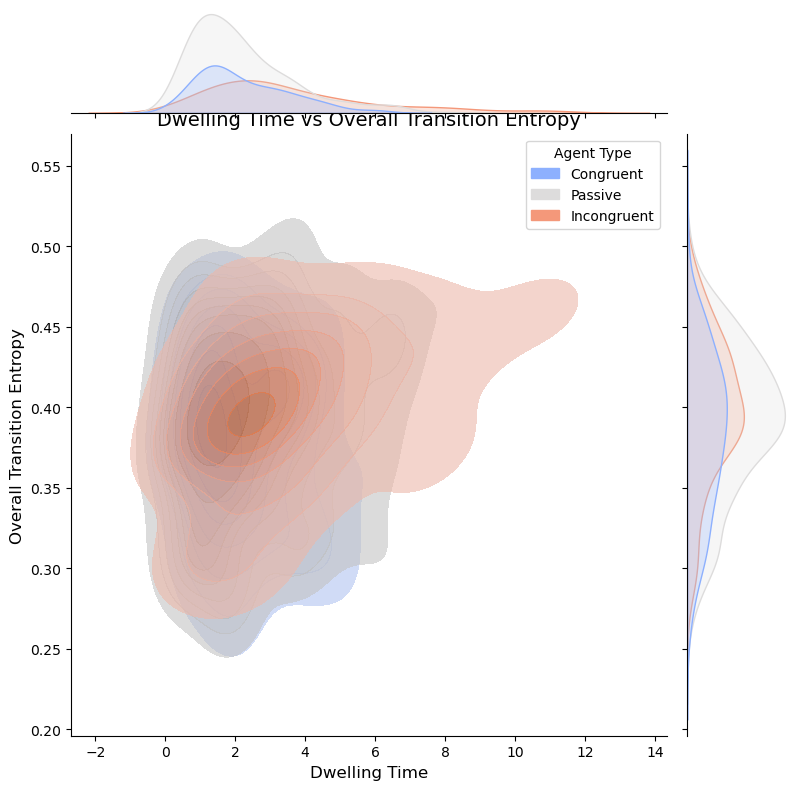

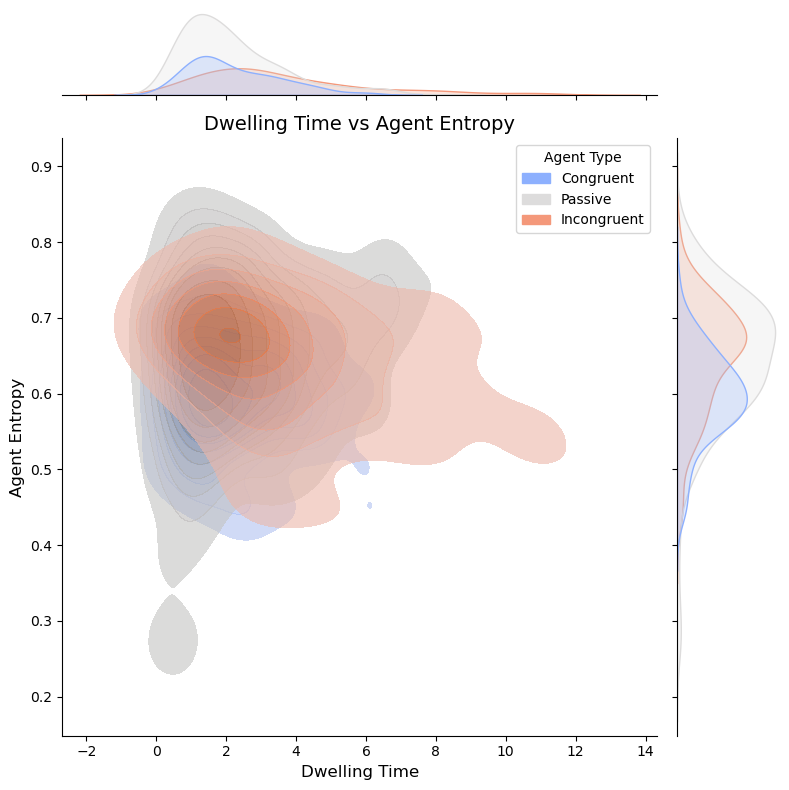

In [25]:
# Reorder the Agent_type categories
Complete_Long['Agent_type'] = pd.Categorical(
    Complete_Long['Agent_type'], 
    categories=[ 'Congruent', 'Passive','Incongruent'], 
    ordered=True
)

# Jointplot 1: Dwelling Time vs Overall Transition Entropy
plot1 = sns.jointplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Overall_Transition_Entropy",
    hue="Agent_type",
    kind="kde",
    height=8,
    fill=True,  # Fill the KDE areas
    alpha=0.6,  # Transparency for filled areas
    palette="coolwarm"  # Use a visually appealing palette
)
plot1.ax_joint.set_title("Dwelling Time vs Overall Transition Entropy", fontsize=14)
plot1.ax_joint.set_xlabel("Dwelling Time", fontsize=12)
plot1.ax_joint.set_ylabel("Overall Transition Entropy", fontsize=12)
plot1.ax_joint.legend_.set_title("Agent Type")  # Add a legend title

# Jointplot 2: Dwelling Time vs Agent Entropy
plot2 = sns.jointplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Entropy",
    hue="Agent_type",
    kind="kde",
    height=8,
    fill=True,  # Fill the KDE areas
    alpha=0.6,  # Transparency for filled areas
    palette="coolwarm"  # Consistent palette
)
plot2.ax_joint.set_title("Dwelling Time vs Agent Entropy", fontsize=14)
plot2.ax_joint.set_xlabel("Dwelling Time", fontsize=12)
plot2.ax_joint.set_ylabel("Agent Entropy", fontsize=12)
plot2.ax_joint.legend_.set_title("Agent Type")  # Add a legend title

# Adjust layout and save the plots
plt.tight_layout()

# Save each plot separately or combine them
plot1.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Jointplot_Dwelling_vs_Overall_Entropy.png", dpi=300, bbox_inches="tight")
plot2.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Jointplot_Dwelling_vs_Agent_Entropy.png", dpi=300, bbox_inches="tight")

plt.show()


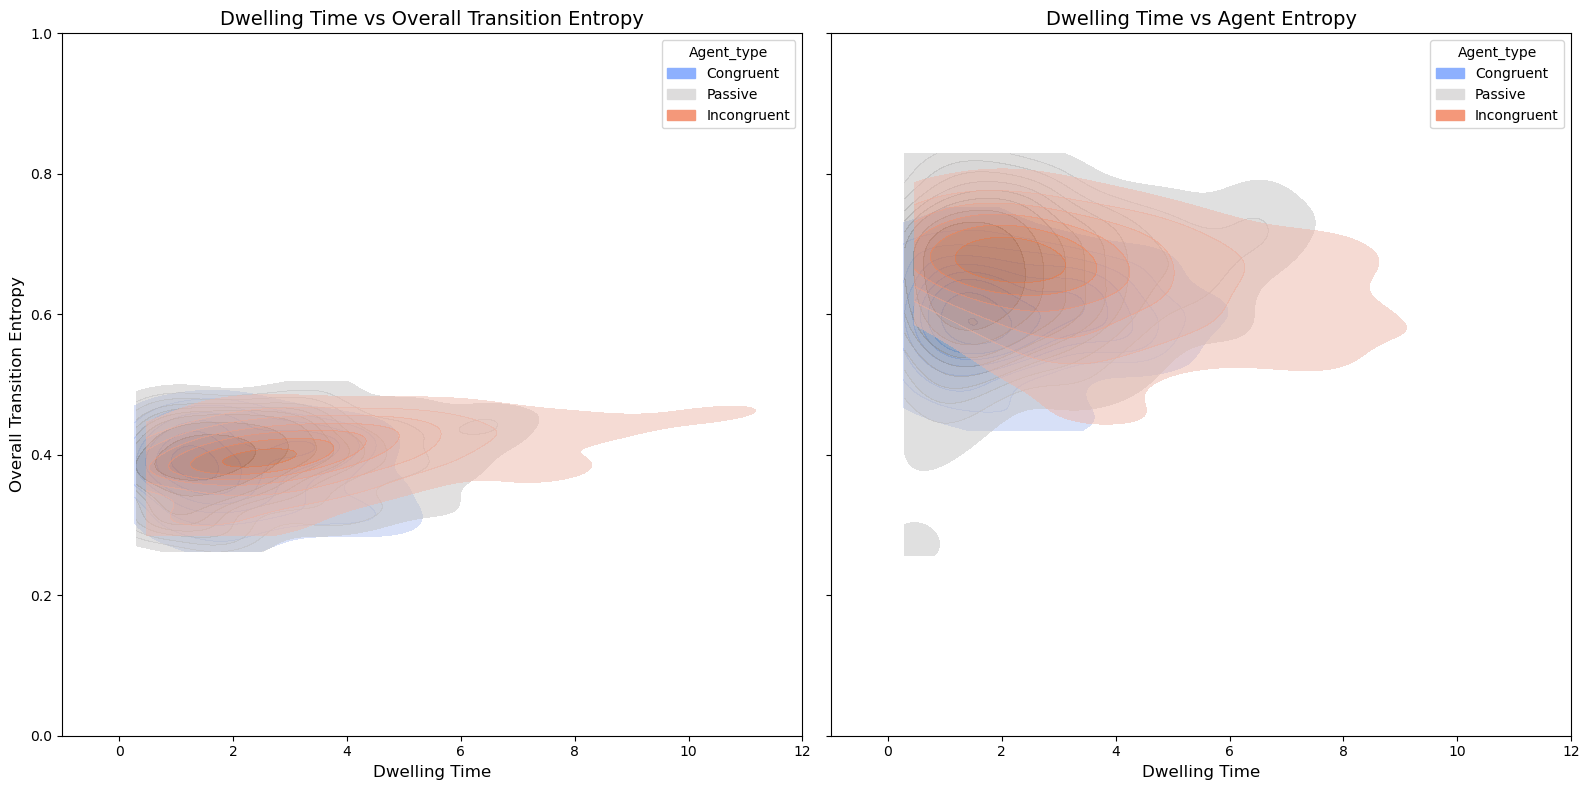

In [26]:
# Create a single figure with two side-by-side plots, sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)  # Add `sharey=True`

# Jointplot 1: Dwelling Time vs Overall Transition Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Overall_Transition_Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette="coolwarm",
    cut=0,  # Prevent the KDE from extending beyond the data's range
    ax=axes[0]
)
axes[0].set_title("Dwelling Time vs Overall Transition Entropy", fontsize=14)
axes[0].set_xlabel("Dwelling Time", fontsize=12)
axes[0].set_ylabel("Overall Transition Entropy", fontsize=12)
axes[0].set_xlim(-1, 12)  # Set x-axis limits
axes[0].set_ylim(0, 1)    # Set y-axis limits

# Jointplot 2: Dwelling Time vs Agent Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Dwelling_Time",
    y="Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette="coolwarm",
    cut=0,  # Prevent the KDE from extending beyond the data's range
    ax=axes[1]
)
axes[1].set_title("Dwelling Time vs Agent Entropy", fontsize=14)
axes[1].set_xlabel("Dwelling Time", fontsize=12)
# Remove redundant y-axis label
axes[1].set_ylabel("")
axes[1].set_xlim(-1, 12)  # Set x-axis limits
axes[1].set_ylim(0, 1)    # Set y-axis limits

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Combined_Jointplots_CustomLimits.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


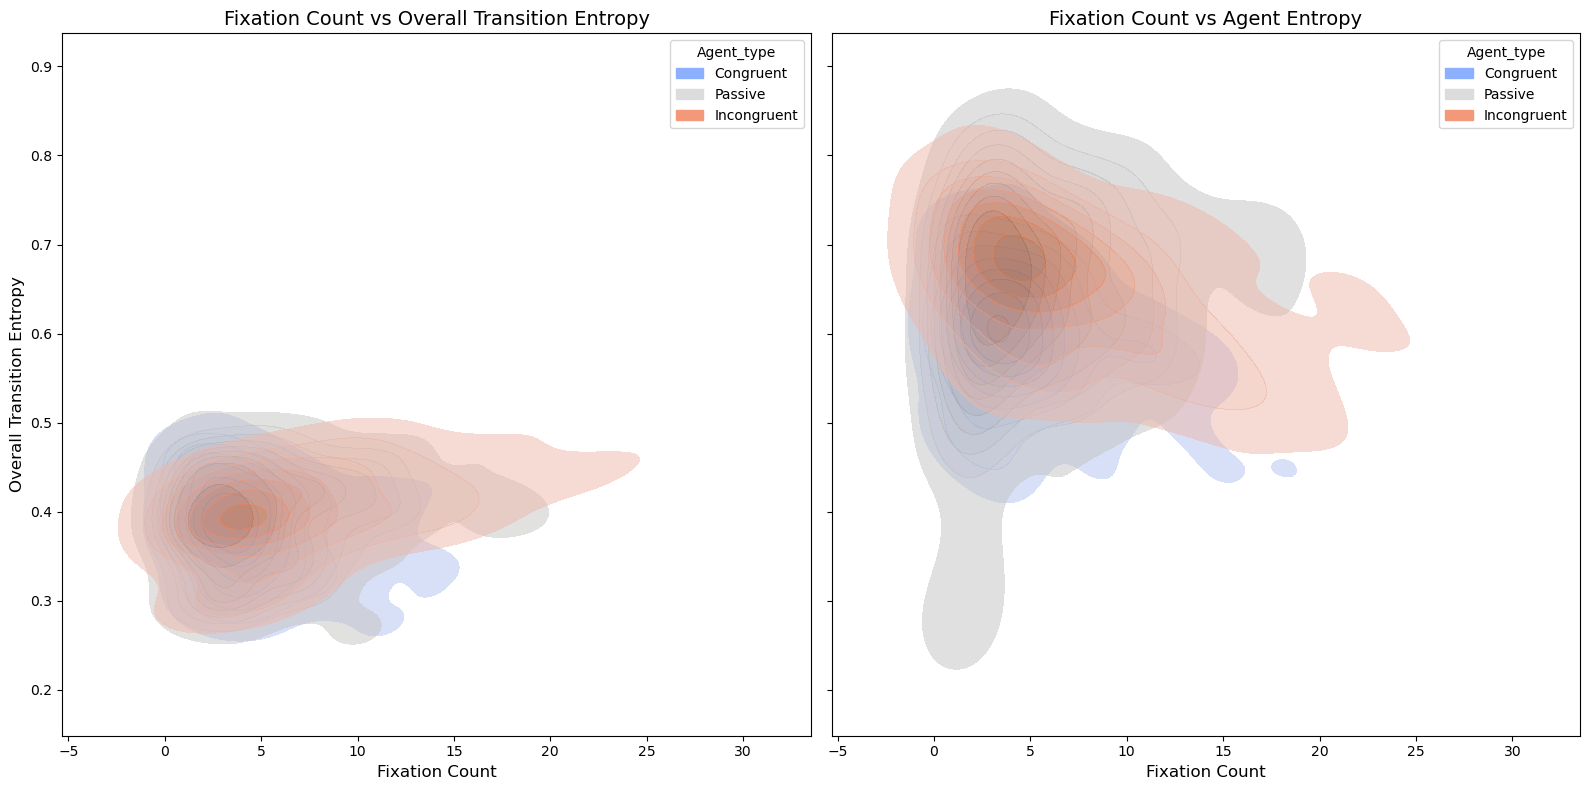

In [27]:
# Create a single figure with two side-by-side plots, sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)  # Add `sharey=True`

# Jointplot 1: Fixation Count vs Overall Transition Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Fixation_Count",
    y="Overall_Transition_Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette="coolwarm",
    ax=axes[0]
)
axes[0].set_title("Fixation Count vs Overall Transition Entropy", fontsize=14)
axes[0].set_xlabel("Fixation Count", fontsize=12)
axes[0].set_ylabel("Overall Transition Entropy", fontsize=12)

# Jointplot 2: Fixation Count vs Agent Entropy
sns.kdeplot(
    data=Complete_Long,
    x="Fixation_Count",
    y="Entropy",
    hue="Agent_type",
    fill=True,
    alpha=0.5,
    palette="coolwarm",
    ax=axes[1]
)
axes[1].set_title("Fixation Count vs Agent Entropy", fontsize=14)
axes[1].set_xlabel("Fixation Count", fontsize=12)
# Remove redundant y-axis label
axes[1].set_ylabel("")

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Combined_FixationCount_Jointplots_SharedY.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


In [28]:
Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation_Explor = Navigation[Navigation.Strategy == "Explorative"]
Navigation_Explor_Agent = Navigation[(Navigation.Strategy == "Explorative") & (Navigation.Decision == "AgentAtChosen")]
Exploration = pd.DataFrame(Navigation_Explor.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration.reset_index(inplace=True)
Exploration_Agent = pd.DataFrame(Navigation_Explor_Agent.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration_Agent.reset_index(inplace=True)
Exploration_Complete = pd.merge(Exploration, Exploration_Agent, on=['ParticipantId', 'Session'])
Exploration_Complete.rename({"ParticipantId": 'ParticipantID', "Session": "SessionNr", "StrategyPerc_x": "Exploration_General", "StrategyPerc_y": "Exploration_Agent", }, axis=1, inplace=True)
Exploration_Complete['ParticipantID'] = Exploration_Complete['ParticipantID'].apply(lambda x: f"{int(x):04d}")
Exploration_Complete.head()

ParticipantID  SessionNr  Exploration_General  Exploration_Agent
0          0365          1                0.600               0.58
1          0365          2                0.575               0.48
2          0365          3                0.410               0.27
3          0365          4                0.440               0.34
4          0365          5                0.460               0.37

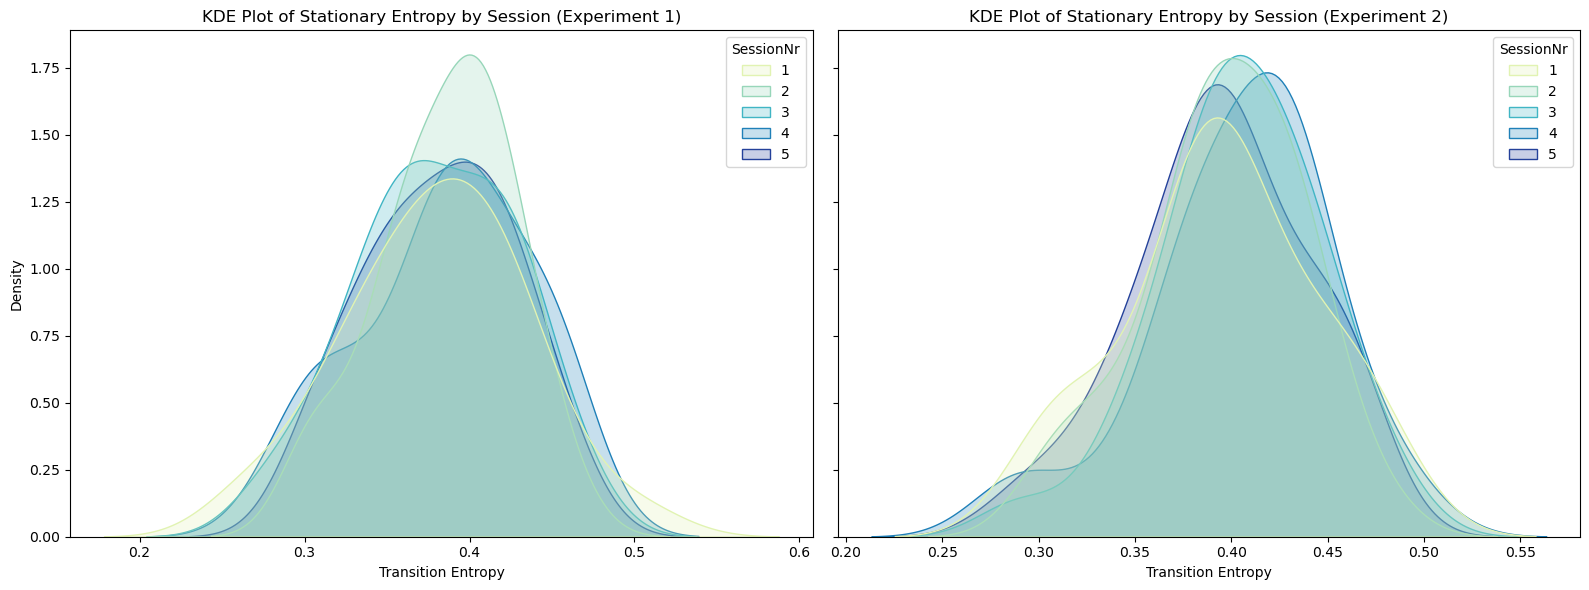

In [29]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side KDE plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# KDE for Experiment 1
sns.kdeplot(data=data_1, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[0],
            palette=palette[:num_sessions_1])
axes[0].set_title("KDE Plot of Stationary Entropy by Session (Experiment 1)")
axes[0].set_xlabel("Transition Entropy")
axes[0].set_ylabel("Density")

# KDE for Experiment 2
sns.kdeplot(data=data_2, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[1],
            palette=palette[:num_sessions_2])
axes[1].set_title("KDE Plot of Stationary Entropy by Session (Experiment 2)")
axes[1].set_xlabel("Transition Entropy")

plt.tight_layout()
plt.show()


In [30]:
# Merging the dataframes on 'SubjectID' and 'SessionNr'
merged_df = pd.merge(stacked_df, Coverage, on=['ParticipantID', 'SessionNr'])
Exploration_Entropy = pd.merge(merged_df, Exploration_Complete, on=['ParticipantID', 'SessionNr']) 
Exploration_Entropy.head()

Overall_Transition_Entropy  Transition_Entropy_Building  \
0                    0.372792                     0.373848   
1                    0.388197                     0.399520   
2                    0.422809                     0.409986   
3                    0.406077                     0.435806   
4                    0.370943                     0.432476   

   Stationary_Entropy_Building  Transition_Entropy_Background  \
0                     0.163934                       0.363942   
1                     0.163613                       0.393755   
2                     0.167412                       0.404376   
3                     0.163079                       0.363507   
4                     0.156274                       0.314108   

   Stationary_Entropy_Background  Transition_Entropy_TaskBuilding_Residential  \
0                       0.162436                                     0.406738   
1                       0.163403                                     0.382776   
2                       0.163298                                     0.480546   
3                       0.147103                                     0.521534   
4                       0.130542                                     0.521783   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.097264   
1                                     0.110629   
2                                     0.109643   
3                                     0.077872   
4                                     0.070081   

   Transition_Entropy_Passive_Agent  Stationary_Entropy_Passive_Agent  \
0                          0.372848                          0.009262   
1                          0.412787                          0.010249   
2                          0.533218                          0.010795   
3                          0.561920                          0.009614   
4                          0.570015                          0.011895   

   Transition_Entropy_TaskBuilding_Public  ...  \
0                                0.369477  ...   
1                                0.363531  ...   
2                                0.529522  ...   
3                                0.491361  ...   
4                                0.562856  ...   

   Stationary_Entropy_Active_Agent_Face  ParticipantID  SessionNr  \
0                              0.003991           1754          1   
1                              0.001761           1754          2   
2                              0.001222           1754          3   
3                              0.001712           1754          4   
4                              0.001197           1754          5   

   IndividualNodeCount  Experiment  CummulativeNodeCount  IndividualRatio  \
0                   85        Exp1                    85         0.537975   
1                   95        Exp1                   119         0.601266   
2                   90        Exp1                   130         0.569620   
3                  108        Exp1                   138         0.683544   
4                  109        Exp1                   138         0.689873   

   CummulativeRatio  Exploration_General Exploration_Agent  
0          0.537975               0.7800              0.78  
1          0.753165               0.6025              0.55  
2          0.822785               0.5500              0.41  
3          0.873418               0.5425              0.47  
4          0.873418               0.4375              0.32  

[5 rows x 28 columns]

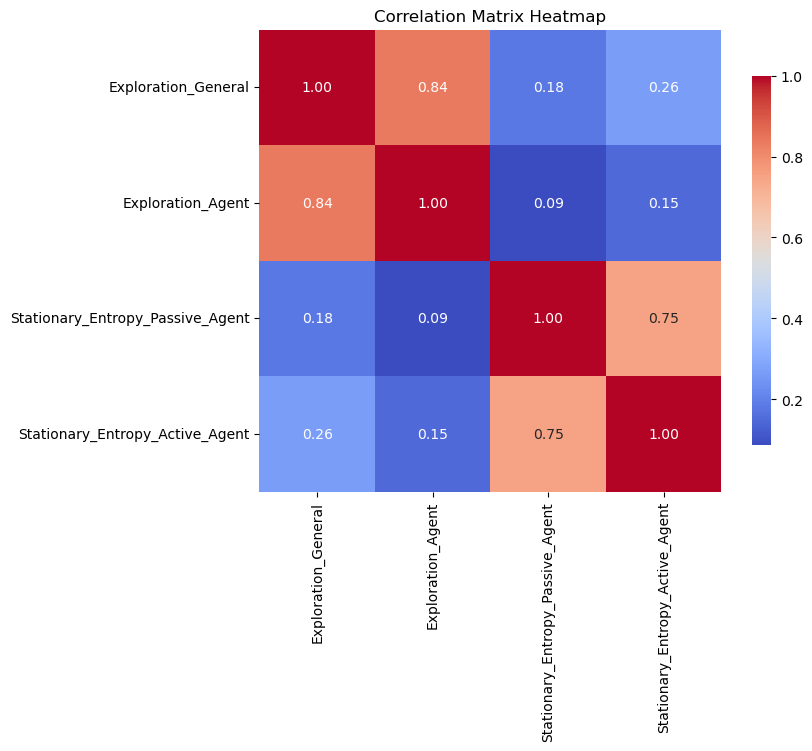

In [31]:
Corr = Exploration_Entropy[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: xlabel='Transition_Entropy_Active_Agent', ylabel='Exploration_Agent'>

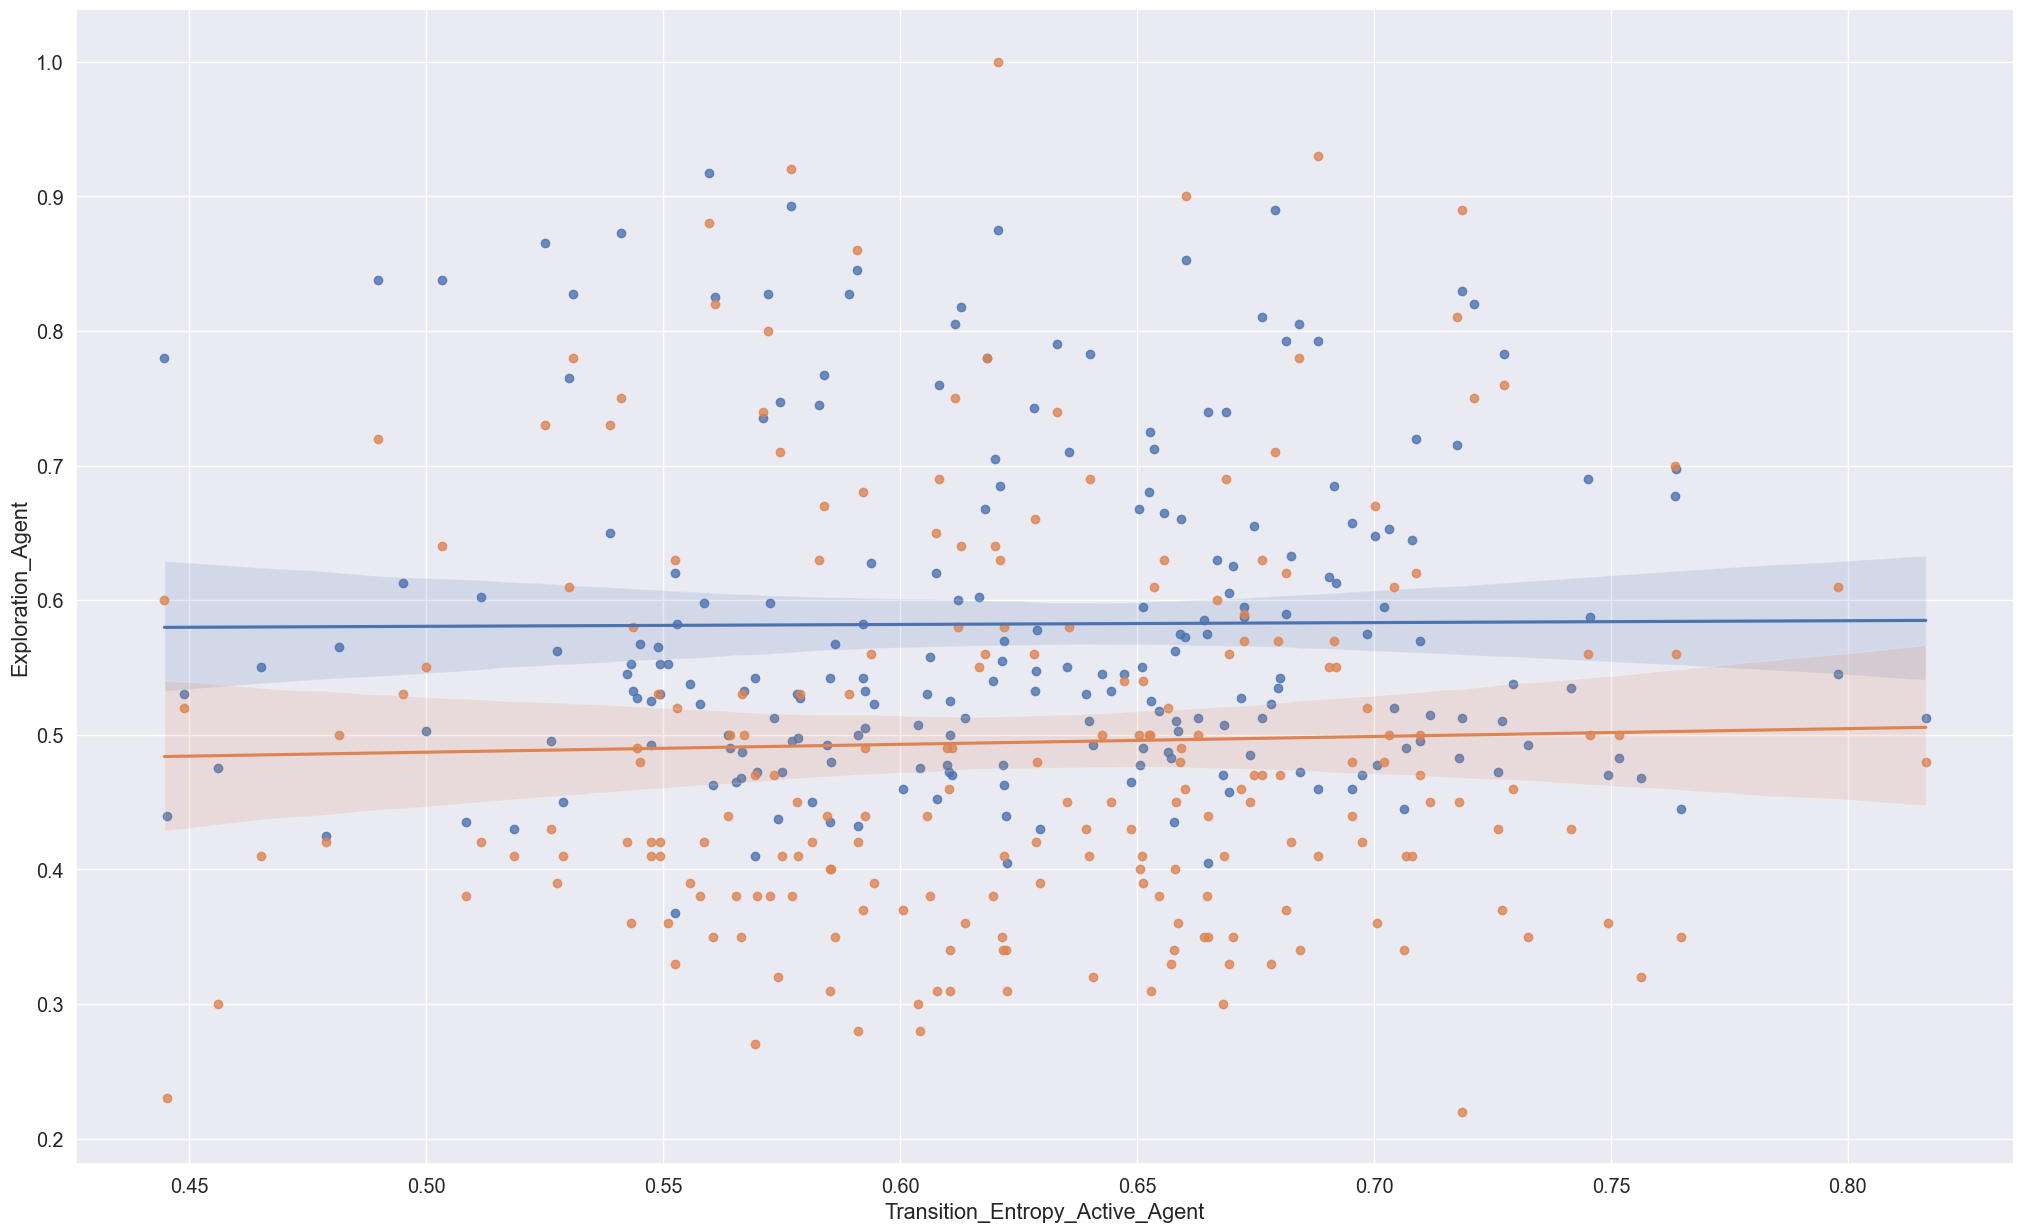

In [32]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.regplot(x='Transition_Entropy_Active_Agent', y='Exploration_General',
                data=Exploration_Entropy)
sns.regplot(x='Transition_Entropy_Active_Agent', y='Exploration_Agent',
                data=Exploration_Entropy)

KeyError: 'Fixation_Count'

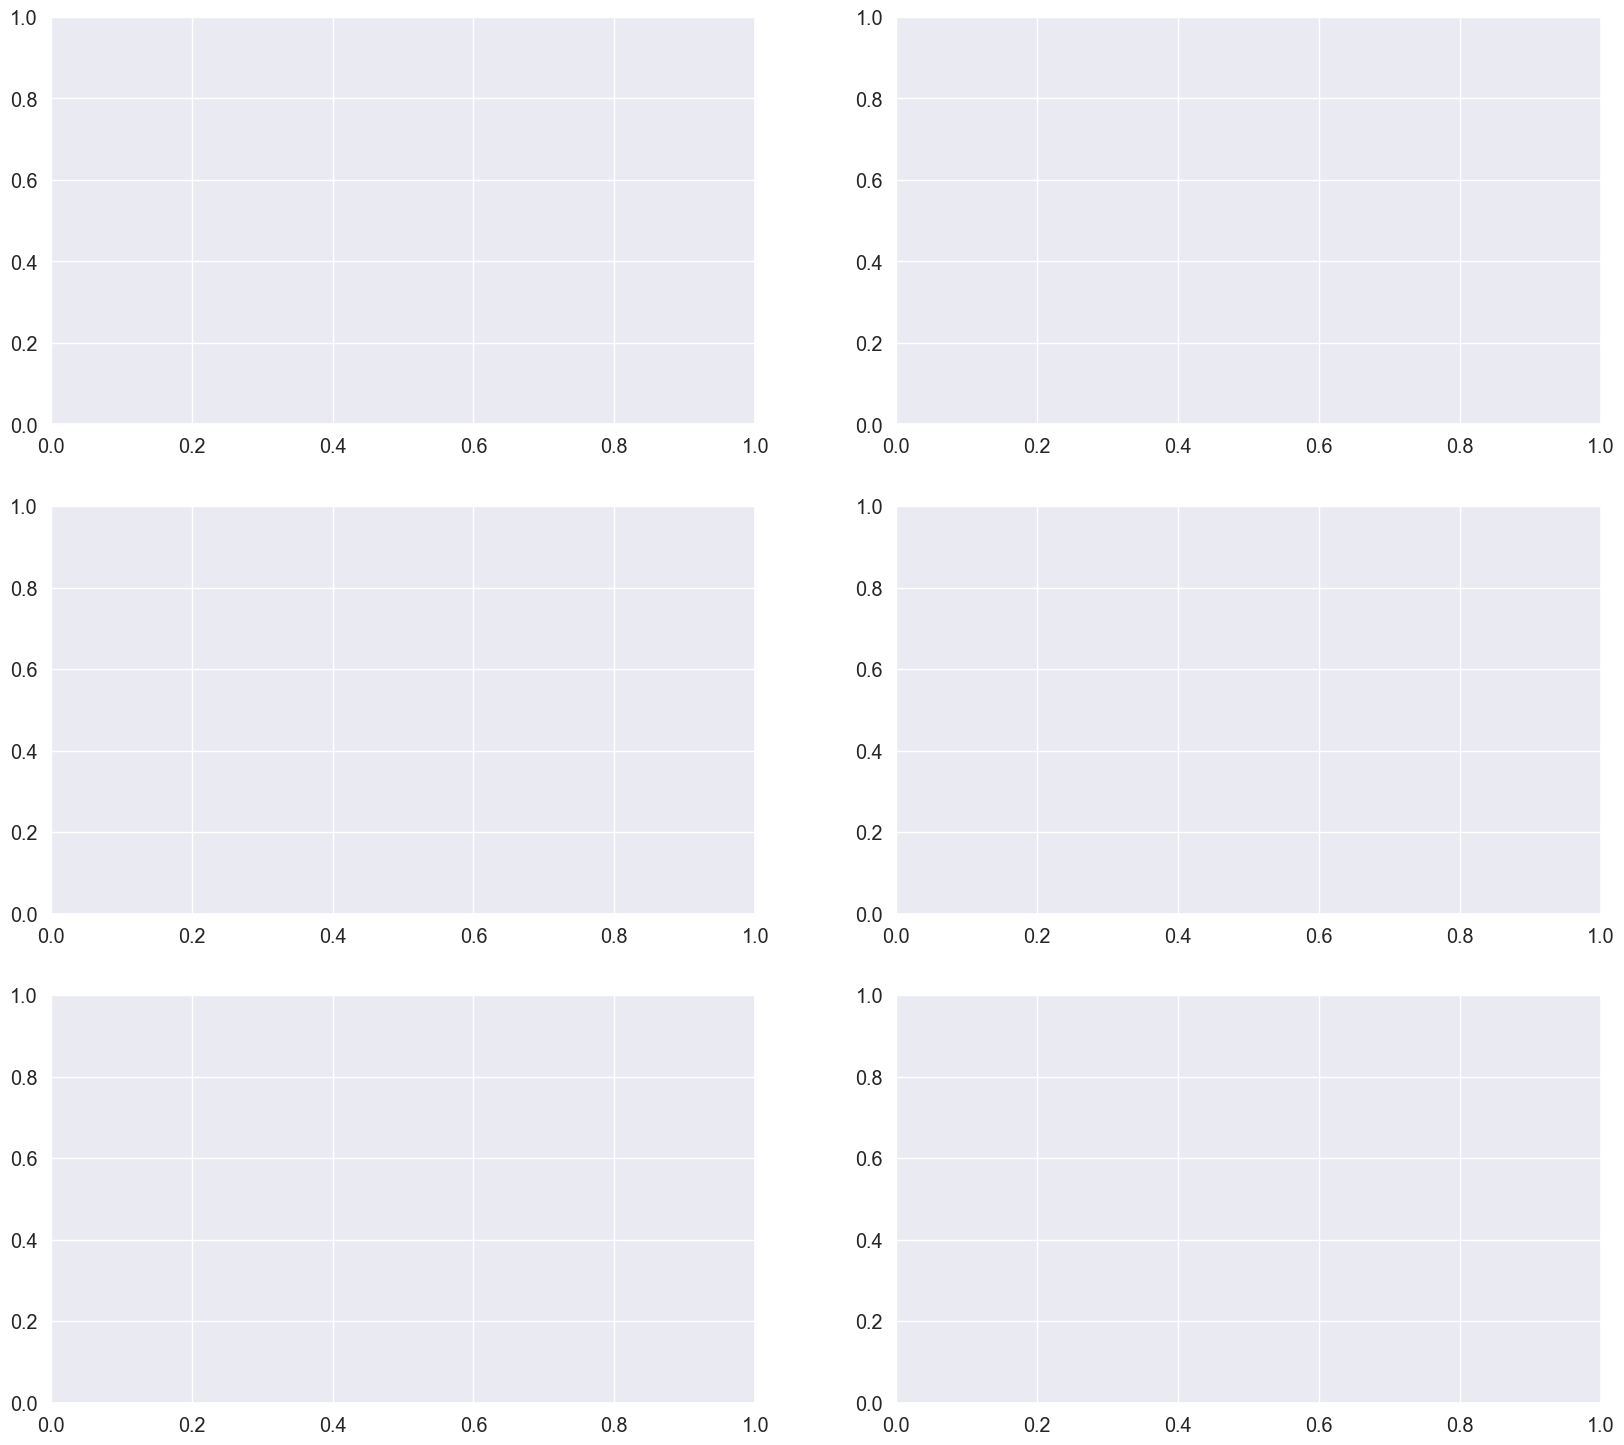

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and 2 rows, 3 columns of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

# Flatten the axes array to easily iterate through it
axes = axes.flatten()

# Loop through the unique SessionNr values and plot in the corresponding subplot
for i, session in enumerate(combined_data_fixations['SessionNr'].unique()):
    # Plot on the corresponding axis
    sns.regplot(data=combined_data_fixations[combined_data_fixations.SessionNr == session], 
                y="Transition_Entropy_Active_Agent", 
                x="Fixation_Count", ax=axes[i])
    
    # Set title for each plot
    axes[i].set_title(f"Session {session}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
combined_data_fixations.head()

In [ ]:
combined_data_fixations.head()

In [ ]:
combined_data_fixations.head()

In [ ]:
combined_data_fixations_Agent = combined_data_fixations[['ParticipantID', 'SessionNr','Transition_Entropy_Passive_Agent', 'Transition_Entropy_Active_Agent']].copy()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns that should be included in the correlation matrix for both Active and Passive agents
extra_columns = ['Dwelling_Time', 'Fixation_Count', 'Overall_Transition_Entropy']

# Create a list of columns for each agent type (Active or Passive), excluding 'Stationary' columns
active_columns = [col for col in combined_data_fixations.columns if ('Active' in col or 'Public' in col) and 'Stationary' not in col]
passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col or 'Residential' in col) and 'Stationary' not in col]

# Include the extra columns in both active and passive column lists
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter the data for Active_Agent and Passive_Agent across all sessions
mask_active = combined_data_fixations['Collider_CategoricalN'] == 'Active_Agent'
mask_passive = combined_data_fixations['Collider_CategoricalN'] == 'Passive_Agent'

filtered_active = combined_data_fixations[mask_active]
filtered_passive = combined_data_fixations[mask_passive]

# Select the columns for each type of agent (including the extra columns and excluding 'Stationary' columns)
filtered_active_data = filtered_active[active_columns]
filtered_passive_data = filtered_passive[passive_columns]

# Calculate the correlation matrices for both Active_Agent and Passive_Agent
corr_matrix_active = filtered_active_data.corr()
corr_matrix_passive = filtered_passive_data.corr()

# Create a figure for plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # One row, two columns for Active/Passive

# Plot the Active_Agent correlation matrix on the left column
sns.heatmap(corr_matrix_active, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, ax=axes[0])
axes[0].set_title('Active Agent - Correlation Matrix')

# Plot the Passive_Agent correlation matrix on the right column
sns.heatmap(corr_matrix_passive, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, ax=axes[1])
axes[1].set_title('Passive Agent - Correlation Matrix')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns that should be included in the correlation matrix for both Active and Passive agents
extra_columns = ['Dwelling_Time', 'Fixation_Count', 'Overall_Transition_Entropy']

# Create a list of columns for Active_Agent and Passive_Agent, excluding 'Stationary' columns
active_columns = [col for col in combined_data_fixations.columns if ('Active' in col or 'Public' in col) and 'Stationary' not in col]
passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col or 'Residential' in col) and 'Stationary' not in col]
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter the data for Active_Agent and Passive_Agent
mask_active = combined_data_fixations['Collider_CategoricalN'] == 'Active_Agent'
mask_passive = combined_data_fixations['Collider_CategoricalN'] == 'Passive_Agent'

filtered_active = combined_data_fixations[mask_active]
filtered_passive = combined_data_fixations[mask_passive]

# Further separate Active_Agent by `Condition`
filtered_active_congruent = filtered_active[filtered_active['Condition'] == 'Congruent']
filtered_active_incongruent = filtered_active[filtered_active['Condition'] == 'Incongruent']

# Select the columns for each category
filtered_active_congruent_data = filtered_active_congruent[active_columns]
filtered_active_incongruent_data = filtered_active_incongruent[active_columns]
filtered_passive_data = filtered_passive[passive_columns]

# Calculate the correlation matrices
corr_matrix_congruent = filtered_active_congruent_data.corr()
corr_matrix_incongruent = filtered_active_incongruent_data.corr()
corr_matrix_passive = filtered_passive_data.corr()

# Create a figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(28, 8))  # One row, three columns for Passive, Congruent, Incongruent

# Function to replace underscores with spaces in tick labels
def format_ticks(labels):
    return [label.get_text().replace("_", " ") for label in labels]


# Plot the Passive_Agent correlation matrix
sns.heatmap(corr_matrix_passive, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, mask=corr_matrix_passive.isnull(), ax=axes[0])
axes[0].set_title('Passive Agent - Significant Correlation Matrix')
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right')
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0)

# Plot the Congruent condition correlation matrix
sns.heatmap(corr_matrix_congruent, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, mask=corr_matrix_congruent.isnull(), ax=axes[1])
axes[1].set_title('Active Agent - Congruent Condition - Significant Correlation Matrix')
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right')
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0)

# Plot the Incongruent condition correlation matrix
sns.heatmap(corr_matrix_incongruent, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, mask=corr_matrix_incongruent.isnull(), ax=axes[2])
axes[2].set_title('Active Agent - Incongruent Condition - Significant Correlation Matrix')
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right')
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0)
plt.tight_layout()
# Save the figure before displaying
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Entropy_correlation_matrices.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

def calculate_significant_correlations(df, alpha=0.05):
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

    for row in df.columns:
        for col in df.columns:
            if row != col:
                valid_data = df[[row, col]].dropna()
                if len(valid_data) > 1:  # Ensure enough data points for correlation
                    _, p_value = pearsonr(valid_data[row], valid_data[col])
                    p_matrix.at[row, col] = p_value
                else:
                    p_matrix.at[row, col] = np.nan  # Mark as NaN if insufficient data

    # Mask non-significant correlations
    mask = (p_matrix > alpha) | (p_matrix.isna())
    corr_matrix[mask] = np.nan
    return corr_matrix


# Columns that should be included in the correlation matrix for both Active and Passive agents
extra_columns = ['Dwelling_Time', 'Fixation_Count', 'Overall_Transition_Entropy']

# Create a list of columns for Active_Agent and Passive_Agent, excluding 'Stationary' columns
active_columns = [col for col in combined_data_fixations.columns if ('Active' in col or 'Public' in col) and 'Stationary' not in col]
passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col or 'Residential' in col) and 'Stationary' not in col]
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter the data for Active_Agent and Passive_Agent
mask_active = combined_data_fixations['Collider_CategoricalN'] == 'Active_Agent'
mask_passive = combined_data_fixations['Collider_CategoricalN'] == 'Passive_Agent'

filtered_active = combined_data_fixations[mask_active]
filtered_passive = combined_data_fixations[mask_passive]

# Further separate Active_Agent by `Condition`
filtered_active_congruent = filtered_active[filtered_active['Condition'] == 'Congruent']
filtered_active_incongruent = filtered_active[filtered_active['Condition'] == 'Incongruent']

# Select the columns for each category
filtered_active_congruent_data = filtered_active_congruent[active_columns]
filtered_active_incongruent_data = filtered_active_incongruent[active_columns]
filtered_passive_data = filtered_passive[passive_columns]

# Calculate the significant correlation matrices
corr_matrix_congruent = calculate_significant_correlations(filtered_active_congruent_data)
corr_matrix_incongruent = calculate_significant_correlations(filtered_active_incongruent_data)
corr_matrix_passive = calculate_significant_correlations(filtered_passive_data)

# Create a figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(28, 8))  # One row, three columns for Passive, Congruent, Incongruent

# Function to replace underscores with spaces in tick labels
def format_ticks(labels):
    return [label.get_text().replace("_", " ") for label in labels]


# Plot the Passive_Agent correlation matrix
sns.heatmap(corr_matrix_passive, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, mask=corr_matrix_passive.isnull(), ax=axes[0])
axes[0].set_title('Passive Agent - Significant Correlation Matrix')
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right')
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0)

# Plot the Congruent condition correlation matrix
sns.heatmap(corr_matrix_congruent, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, mask=corr_matrix_congruent.isnull(), ax=axes[1])
axes[1].set_title('Active Agent - Congruent Condition - Significant Correlation Matrix')
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right')
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0)

# Plot the Incongruent condition correlation matrix
sns.heatmap(corr_matrix_incongruent, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8}, linewidths=0.5, mask=corr_matrix_incongruent.isnull(), ax=axes[2])
axes[2].set_title('Active Agent - Incongruent Condition - Significant Correlation Matrix')
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right')
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0)

# Adjust layout for better spacing
plt.tight_layout()
# Save the figure before displaying
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Entropy_significant_correlation_matrices.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
combined_data_fixations_Agent.head()

In [ ]:

# Update the Group column to handle Passive Agent correctly
combined_data_fixations_Agent['Group'] = combined_data_fixations_Agent.apply(
    lambda row: row['Agent_Type'] if row['Agent_Type'] == 'Passive Agent' else f"{row['Agent_Type']} - {row['Condition']}", axis=1
)

# Plot the distribution of Agent Entropy with Congruent/Incongruent distinction
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=combined_data_fixations_Agent,
    x="Agent_Entropy",
    hue="Group",
    fill=True,
    common_norm=False,
    palette={
        "Passive Agent": "#1f77b4",
        "Active Agent - Congruent": "#d62728",
        "Active Agent - Incongruent": "#ff7f7f"
    }
)

# Set plot titles and labels
plt.title("Distribution of Agent Entropy by Agent Type and Condition")
plt.xlabel("Agent Entropy")
plt.ylabel("Density")

# Save the plot
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Agent_Entropy_Distribution_by_Condition.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
combined_data_fixations_Agent.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Function to calculate the correlation matrix with significance masking
def calculate_significant_correlations(df, alpha=0.05):
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)
    
    # Calculate p-values
    for row in df.columns:
        for col in df.columns:
            if row != col:
                _, p_value = pearsonr(df[row].dropna(), df[col].dropna())
                p_matrix.at[row, col] = p_value

    # Mask non-significant correlations
    mask = p_matrix > alpha
    corr_matrix[mask] = np.nan
    return corr_matrix

# Columns that should be included in the correlation matrix for both Active and Passive agents
extra_columns = ['Dwelling_Time', 'Fixation_Count', 'Overall_Transition_Entropy']

# Create a list of columns for Active_Agent and Passive_Agent, excluding 'Stationary' columns
active_columns = [col for col in combined_data_fixations.columns if ('Active' in col or 'Public' in col) and 'Stationary' not in col]
passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col or 'Residential' in col) and 'Stationary' not in col]
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter the data for Active_Agent and Passive_Agent
mask_active = combined_data_fixations['Collider_CategoricalN'] == 'Active_Agent'
mask_passive = combined_data_fixations['Collider_CategoricalN'] == 'Passive_Agent'

filtered_active = combined_data_fixations[mask_active]
filtered_passive = combined_data_fixations[mask_passive]

# Further separate Active_Agent by `Condition`
filtered_active_congruent = filtered_active[filtered_active['Condition'] == 'Congruent']
filtered_active_incongruent = filtered_active[filtered_active['Condition'] == 'Incongruent']

# Create a figure for plotting dwelling time distributions
fig, axes = plt.subplots(1, 3, figsize=(28, 8))  # One row, three columns for Passive, Congruent, Incongruent

# Plot the Passive_Agent dwelling time distribution
sns.histplot(filtered_passive['Dwelling_Time'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Passive Agent - Dwelling Time Distribution')
axes[0].set_xlabel('Dwelling Time')
axes[0].set_ylabel('Frequency')

# Plot the Congruent condition dwelling time distribution
sns.histplot(filtered_active_congruent['Dwelling_Time'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Active Agent - Congruent Condition - Dwelling Time Distribution')
axes[1].set_xlabel('Dwelling Time')
axes[1].set_ylabel('Frequency')

# Plot the Incongruent condition dwelling time distribution
sns.histplot(filtered_active_incongruent['Dwelling_Time'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Active Agent - Incongruent Condition - Dwelling Time Distribution')
axes[2].set_xlabel('Dwelling Time')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
# Save the figure before displaying
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Dwelling_Time_Distributions.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
def create_palette(colormap_name, indices):
    try:
        colormap = plt.get_cmap(colormap_name)
        palette = colormap(indices)
        return palette
    except ValueError:
        print(f"Colormap '{colormap_name}' is not found.")
        return None

def display_palette(palette, title):
    if palette is not None:
        sns.palplot(palette)
        plt.title(title)
    else:
        print(f"Palette for '{title}' could not be displayed.")

num_colors = 200
color_indices = np.linspace(0, 1, num_colors)
selected_indices = list(range(0, 200, 10))

# Dictionary to store palettes
palettes = {}

# Create palettes for each colormap
for colormap_name in ['cmc.bukavu','cmc.vik','cmc.managua','cmc.lipari', 'cmc.berlin','cmc.roma', 'cividis', 'viridis']:
    palettes[colormap_name] = create_palette(colormap_name, color_indices[selected_indices])

In [ ]:
palettes['cmc.roma']

In [ ]:
Corr = combined_data_fixations[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()